We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

# Definition & Working principle
Let's build model using **Linear regression**.

Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 



## Import Library and Dataset
Now we will import couple of python library required for our analysis and import dataset 

In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
# Import dataset
df = pd.read_csv('ins.csv')
#Lets look into top few rows and columns in the dataset
df.head()

,Insurance Id,age,sex,bmi,children,smoker,region,charges
0,1219869,19,female,27.900,0.0,yes,southwest,16884.92400
1,842301,18,male,33.770,1.0,no,southeast,1725.55230
2,1391175,28,male,33.000,3.0,NaN,southeast,4449.46200
3,54198,33,male,22.705,0.0,no,northwest,21984.47061
4,1427400,32,male,28.880,0.0,no,northwest,3866.85520


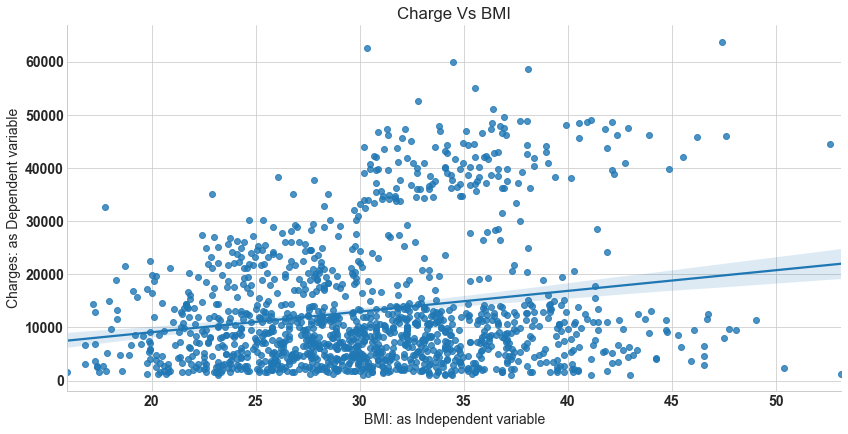

In [3]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('BMI: as Independent variable')
plt.ylabel('Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In above plot we fit regression line into the variables.

## Exploratory data analysis

In [4]:
df.describe()

,Insurance Id,age,bmi,children,charges
count,1.338000e+03,1338.000000,1336.000000,1335.000000,1338.000000
mean,2.397620e+07,39.207025,30.665359,1.095880,13270.422265
std,3.495066e+07,14.049960,6.087624,1.206469,12110.011237
min,1.152000e+03,18.000000,15.960000,0.000000,1121.873900
25%,1.423498e+06,27.000000,26.308750,0.000000,4740.287150
50%,4.916439e+06,39.000000,30.400000,1.000000,9382.033000
75%,3.847858e+07,51.000000,34.681250,2.000000,16639.912515
max,1.151968e+08,64.000000,53.130000,5.000000,63770.428010


###  Check for missing value

In [5]:
df.isnull().sum()

Insurance Id    0
age             0
sex             0
bmi             2
children        3
smoker          5
region          0
charges         0
dtype: int64

In [6]:
df['bmi']=df['bmi'].fillna(30.66)

In [7]:
df['children']=df['children'].fillna(1)

In [8]:
df['smoker']=df['smoker'].fillna('no')

In [9]:
df.isnull().sum()

Insurance Id    0
age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
dtype: int64

### Plots

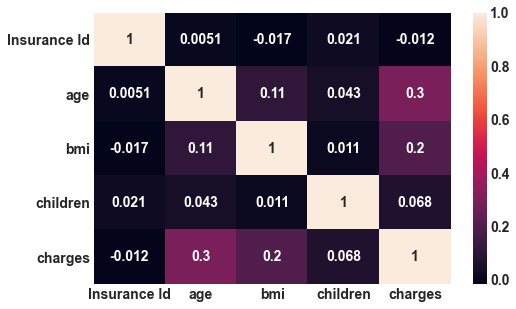

In [10]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, annot= True);

Thier no correlation among valiables.

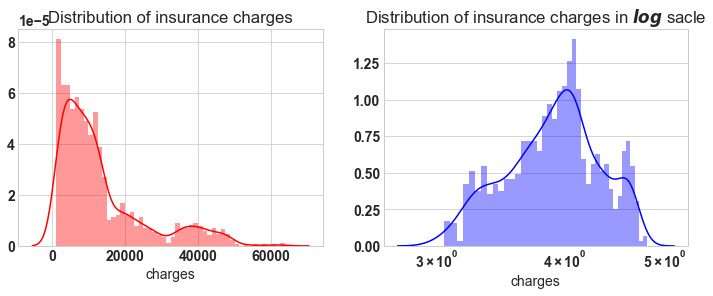

In [11]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges. 

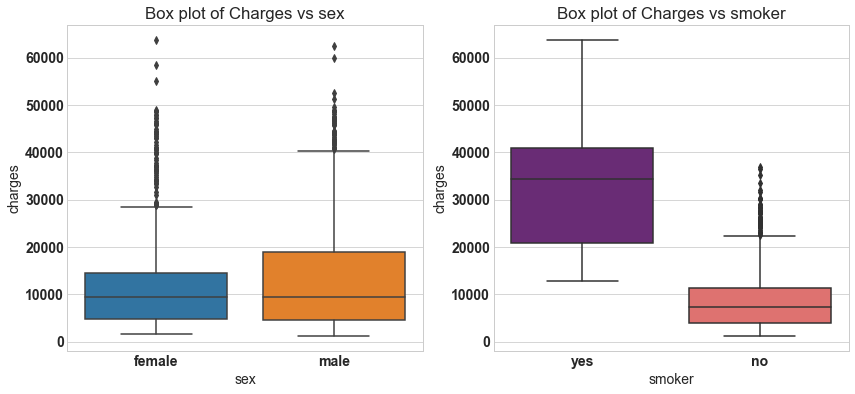

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.boxplot(x='sex', y='charges',data=df,ax=ax)
ax.set_title('Box plot of Charges vs sex')

ax = f.add_subplot(122)
sns.boxplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Box plot of Charges vs smoker');

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

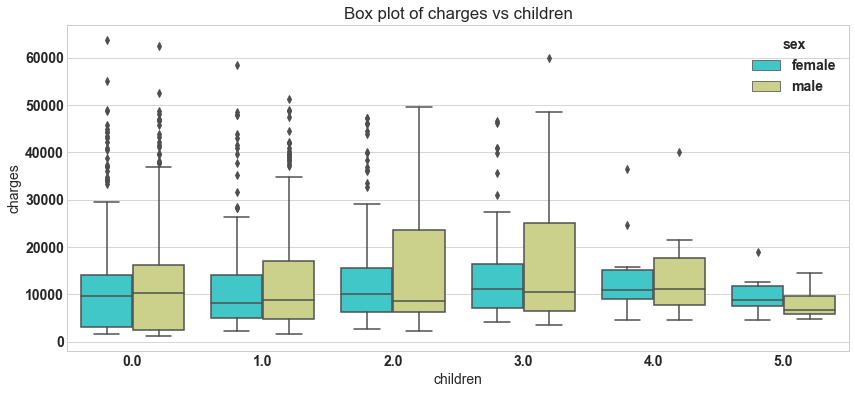

In [13]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [14]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0.0,12374.063067,1121.8739,63770.42801
1.0,12715.789327,1711.0268,58571.07448
2.0,15073.563734,2304.0022,49577.66240
3.0,15355.318367,3443.0640,60021.39897
4.0,13850.656311,4504.6624,40182.24600
5.0,8786.035247,4687.7970,19023.26000


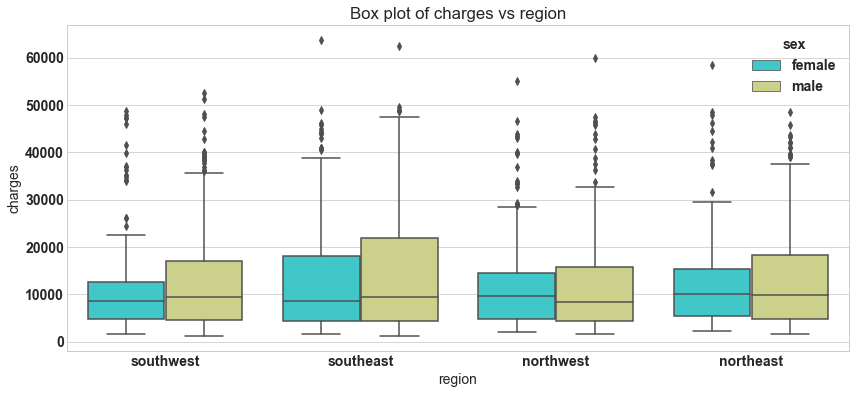

In [15]:
plt.figure(figsize=(14,6))
sns.boxplot(x='region', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs region');

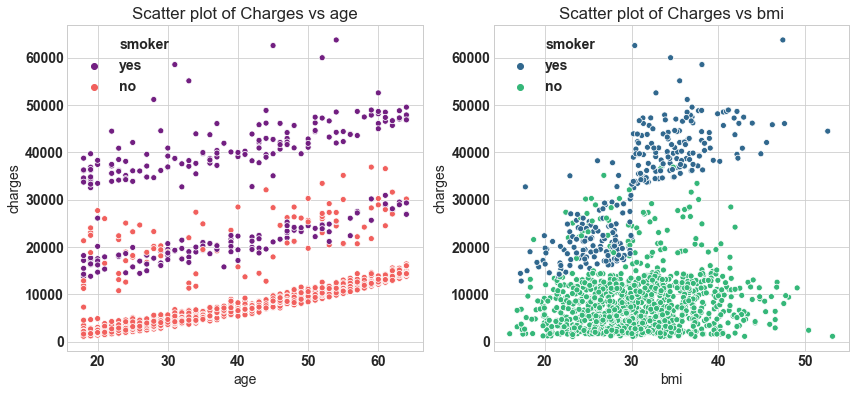

In [16]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

>From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take $1^{st}$ and $2^{nd}$ slab, for smoker policy start at $2^{nd}$ and $3^{rd}$ slab.

>Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16$kg/m^2$ and maximum upto 54$kg/m^2$

## Data Preprocessing
### Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.
 1. Label Encoding
 2. One hot encoding
 3. Dummy variable trap

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A **One hot encoding** is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using *pandas get_dummies* function we can do all above three step in line of code. We will this fuction  to get dummy variable for sex, children,smoker,region features. By setting *drop_first =True* function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

In [17]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [18]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['Insurance Id' 'age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 8)

Columns in data frame after encoding dummy variable:
 ['Insurance Id' 'age' 'bmi' 'charges' 'OHE_male' 'OHE_1.0' 'OHE_2.0'
 'OHE_3.0' 'OHE_4.0' 'OHE_5.0' 'OHE_yes' 'OHE_northwest' 'OHE_southeast'
 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 14)


## Train Test split

In [19]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43)

## Model building

In [20]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 


LinearRegression()

The parameter obtained from both the model are same.So we succefull build our model using normal equation and verified using sklearn linear regression module. Let's move ahead, next step is prediction and model evaluvation.

## Model evaluation
We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute **Mean Square Error** using formula 
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$

$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Here $\mathbf{\hat{y}}$ is predicted value and $\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$.

In [21]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) is:  41755113.09156071
R square obtain for scikit learn library is : 0.7462773270746348


The model returns $R^2$ value of 74.62%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that we have transformer out variable by applying  natural log. When we put model into production antilog is applied to the equation.

In [22]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43)

# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) is:  0.21732936390856838
R square obtain for scikit learn library is : 0.7534048780122673


## Model Validation
In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no *Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

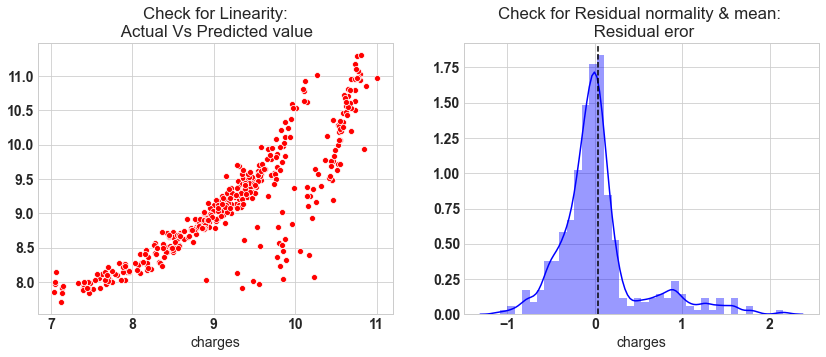

In [23]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

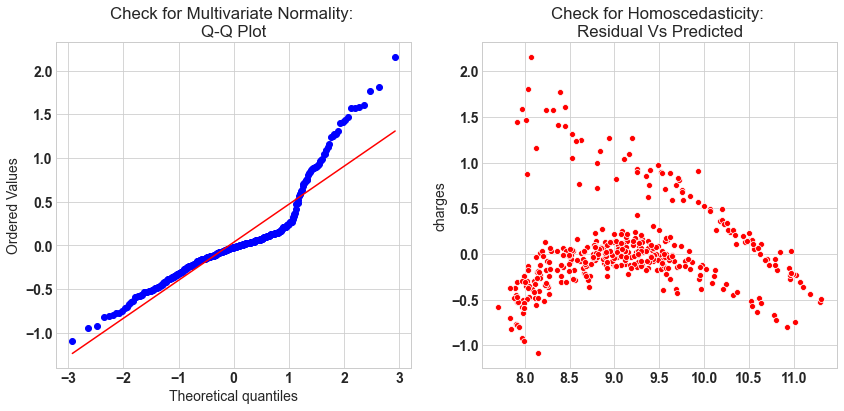

In [24]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [25]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.055230257351752

The model assumption linear regression as follows
1. In our model  the actual vs predicted plot is curve so linear assumption fails
2. The residual mean is zero and residual error plot right skewed
3. Q-Q plot shows as value log value greater than 1.5 trends to increase
4. The plot is exhibit heteroscedastic, error will insease after certian point.
5. Variance inflation factor value is less than 5, so no multicollearity.